<a href="https://colab.research.google.com/github/josephgeorgeMLDL1/Hyperparameter_Tuning/blob/main/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
print(tf.__version__)

2.9.2


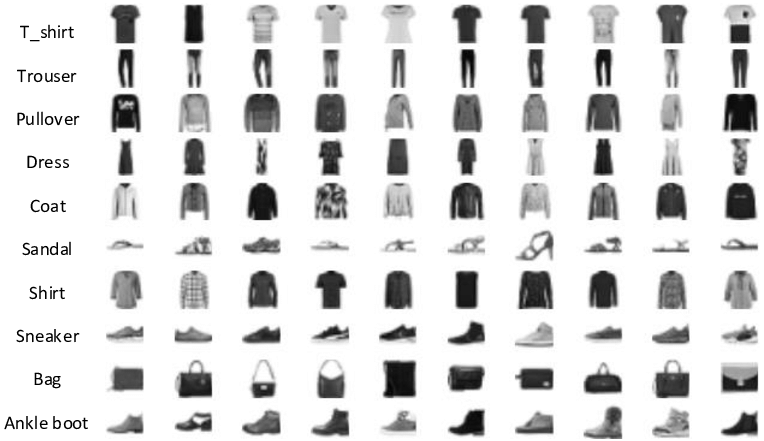

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
#Scaling data 0 to 1
np.min(train_images)

0

In [7]:
np.max(train_images)

255

In [8]:
np.min(test_images)

0

In [9]:
np.max(test_images)

255

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

In [11]:
print("Train Minimum", np.min(train_images))
print("Train Maximum",np.max(train_images))
print("Test Minimum",np.min(test_images))
print("Test Maximum",np.max(test_images))

Train Minimum 0.0
Train Maximum 1.0
Test Minimum 0.0
Test Maximum 1.0


In [12]:
train_images[0].shape

(28, 28)

In [13]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

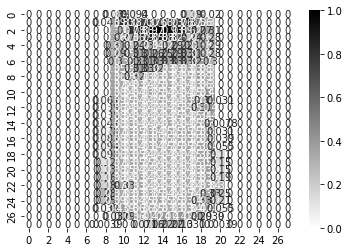

In [15]:
plt.Figure(figsize=(15,15))
sns.heatmap(train_images[2],annot=True,cmap='binary')

In [16]:
len(train_images)

60000

In [17]:
len(test_images)

10000

In [18]:
#Reshaping the data to feed it to CNN
train_images = train_images.reshape(len(train_images), 28,28,1)
test_images = test_images.reshape(len(test_images), 28,28,1)

In [19]:
train_images.shape

(60000, 28, 28, 1)

In [20]:
test_images.shape

(10000, 28, 28, 1)

## Tuning function hp - hyper parameter Tuners

## Tuners





   ### RandomSearch Tuner
   ### Hyperband Tuner
   ### BayesianOptimization Tuner




RandomSearch concept:

    One way to find the optimal parameters is to try every possible combinations of the available parameters [Grid Search], but the number of combinations would increase exponentially as the number of hyperparameters increases. Trying all the combinations one by one takes longer to explore the hyperparameter space. Random search helps to explore more hyperparameter space in less time as compared to Grid Search. Exploring more hyperparameter space does not guarantee the absolute optimal results but close to optimal.

Hyperband Concept:

    This technique tries to remove one of the problems in random search of hyperparameters. Problem is as follows: Random search may pick some values which are very obviously bad and will do full training and evaluation on it, which is wasteful. Hyperband provides one way to solve this problem. Hyperband Solution: Randomly sample all the combinations of hyperparameter and now instead of running full training and evaluation on it, train the model for few epochs (less than max_epochs) with these combinations and select the best candidates based on the results on these few epochs. It does this iteratively and finally runs full training and evaluation on the final chosen candidates. The number of iterations done depends on parameter ‘hyperband_iterations’ and number of epochs in each iteration are less than ‘max_epochs’.

Bayesian Optimization tuner Concept:

    This techniques addresses a common problem in RandomSearch and Hyperband. Problem: All the hyperparameter combinations are chosen randomly. Choosing hyperparameters randomly helps to explore the hyperparameter space but does not guarantee absolute optimal hyperparameters. Solution provided by BayesianOptimization tuner: Instead of all combinations being random, it chooses first few randomly, then based on the performance on these hyperparameters it chooses the next best possible hyperparameters. Hence it takes into account the history of the hyperparameters which were tried. The iterations of choosing next set of hyperparameters based on history and evaluating performance continues till the tuner reaches optimal hyperparameters or exhausts maximum number of allowed trails. Maximum trials are set using parameter ‘max_trails’.



In [22]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=256, step=16),
        kernel_size=hp.Choice('conv_1_kernel_size', values = [2,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel_size', values = [2,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [24]:
import keras_tuner
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [25]:

tuner_search = RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=10,directory='output',project_name="Mnist Fashion")

'''
tuner_search = BayesianOptimization(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

'''

'\ntuner_search = BayesianOptimization(build_model,\n                          objective=\'val_accuracy\',\n                          max_trials=5,directory=\'output\',project_name="Mnist Fashion")\n\n'

In [26]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 10 Complete [00h 00m 29s]
val_accuracy: 0.8608333468437195

Best val_accuracy So Far: 0.9123333096504211
Total elapsed time: 00h 09m 14s


In [27]:
model=tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 192)       960       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       98432     
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 96)                8306784   
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 8,407,146
Trainable params: 8,407,146
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0849 - accuracy: 0.9689 - val_loss: 0.2897 - val_accuracy: 0.9155
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0512 - accuracy: 0.9815 - val_loss: 0.3149 - val_accuracy: 0.9138
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0331 - accuracy: 0.9882 - val_loss: 0.4175 - val_accuracy: 0.9117
Epoch 7/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0240 - accuracy: 0.9915 - val_loss: 0.5389 - val_accuracy: 0.9110
Epoch 8/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0196 - accuracy: 0.9934 - val_loss: 0.5507 - val_accuracy: 0.9080
Epoch 9/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0155 - accuracy: 0.9950 - val_loss: 0.5596 - val_accuracy: 0.9117
Epoch 10/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.5514 

In [30]:
loss, accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5977 - accuracy: 0.9115


In [31]:
loss

0.5977197289466858

In [32]:
accuracy

0.9114999771118164

In [33]:
tuner_search.results_summary()

Results summary
Results in output/Mnist Fashion
Showing 10 best trials
Trial summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel_size: 2
conv_2_filter: 128
conv_2_kernel_size: 2
dense_1_units: 96
learning_rate: 0.001
Score: 0.9123333096504211
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel_size: 5
conv_2_filter: 112
conv_2_kernel_size: 2
dense_1_units: 176
learning_rate: 0.001
Score: 0.9104999899864197
Trial summary
Hyperparameters:
conv_1_filter: 224
conv_1_kernel_size: 5
conv_2_filter: 96
conv_2_kernel_size: 5
dense_1_units: 80
learning_rate: 0.001
Score: 0.9041666388511658
Trial summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel_size: 2
conv_2_filter: 48
conv_2_kernel_size: 5
dense_1_units: 48
learning_rate: 0.001
Score: 0.9001666903495789
Trial summary
Hyperparameters:
conv_1_filter: 176
conv_1_kernel_size: 2
conv_2_filter: 64
conv_2_kernel_size: 2
dense_1_units: 64
learning_rate: 0.01
Score: 0.8816666603088379
Trial summary
Hyperparameters:
conv_1_filte

In [34]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#make float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)



input_shape = (img_rows, img_cols, 1)
print(input_shape)

11490434/11490434 [==============================] - 1s 0us/step
(28, 28, 1)


In [35]:
NUM_CLASSES = 10
INPUT_SHAPE = input_shape

In [36]:
from kerastuner import HyperModel
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

class MNIST_CNN_HyperModel(HyperModel):
  def __init__(self, input_shape, num_classes):
    self.input_shape = INPUT_SHAPE
    self.num_classes = NUM_CLASSES
  
  def build(self,hp):
    model = keras.Sequential()
    model.add(
        Conv2D(
            filters = 32,
            kernel_size = 3,
            activation = 'relu',
            input_shape = self.input_shape
        )
    )

    model.add(
        Conv2D(
            filters = 64,
            kernel_size = 3,
            activation = 'relu'
        )
    )

    model.add(MaxPooling2D(pool_size = 2))

    model.add(
        Dropout(rate = hp.Float(
            'dropout_1',
            min_value = 0.0,
            max_value = 0.5,
            default = 0.25,
            step = 0.05
        ))
    )

    model.add(Flatten())

    model.add(
        Dense(
            units = hp.Int(
                'units',
                min_value = 32,
                max_value = 512,
                step = 32,
                default = 128
            ),
            activation = hp.Choice(
                'dense_activation',
                values = ['relu','tanh','sigmoid'],
                default = 'relu'
            )
        )
    )

    model.add(
        Dropout(
            rate = hp.Float(
                'dropout_3',
                min_value = 0.25,
                max_value = 0.75,
                default = 0.5,
                step = 0.05
            )
        )
    )

    model.add(
        Dense(
            self.num_classes,
            activation = 'softmax'
        )
    )

    model.compile(
        optimizer = keras.optimizers.Adadelta(
            hp.Float(
                'learning_rate',
                min_value = 1e-4,
                max_value = 1e-2,
                sampling = 'LOG',
                default = 1e-3
            )
        ),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=['accuracy']
    )
    return model

In [37]:
hypermodel = MNIST_CNN_HyperModel(input_shape = INPUT_SHAPE, num_classes=NUM_CLASSES)

In [38]:
HYPERBAND_MAX_EPOCHS = 20
MAX_TRIALS = 20
EXECUTION_PER_TRIAL = 2
SEED = 4
INPUT_SHAPE = (28,28,1)
NUM_CLASSES = 10

In [39]:
# Choosing Tuner from Keras Tuner 
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    seed=SEED,
    max_trials=MAX_TRIALS,
    executions_per_trial=EXECUTION_PER_TRIAL
)

In [40]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
dropout_1 (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': 'linear'}
units (Int)
{'default': 128, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout_3 (Float)
{'default': 0.5, 'conditions': [], 'min_value': 0.25, 'max_value': 0.75, 'step': 0.05, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
